# Data explorations

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%cd .. 


df = pd.read_csv("./data/employee-attrition.csv")

df.head()


/home/jafar/Desktop/crayon


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
print([col for col in df.columns if df[col].dtype != "int"])

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [7]:
df["Attrition"].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

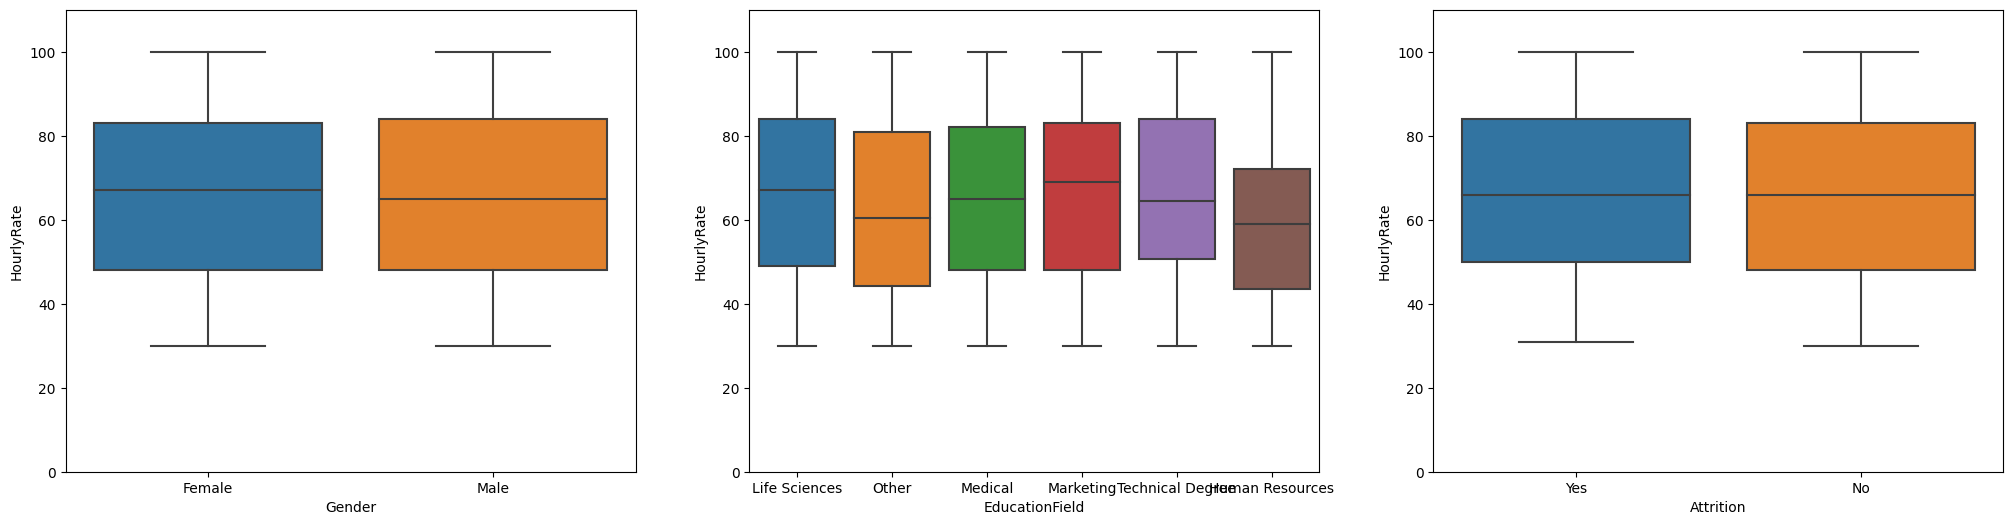

In [8]:
fig, axs =plt.subplots(1,3, figsize=(25, 6))
def plotbox(yaxis, xaxis, ax):
    temp = pd.concat([df[yaxis], df[xaxis]], axis=1)
    fig = sns.boxplot(x=xaxis, y=yaxis, data=temp, ax=ax)
    fig.axis(ymin=0, ymax=df[yaxis].max()*1.1);
for var, ax in zip(["Gender", "EducationField", "Attrition"], axs):
    plotbox("HourlyRate", var, ax)



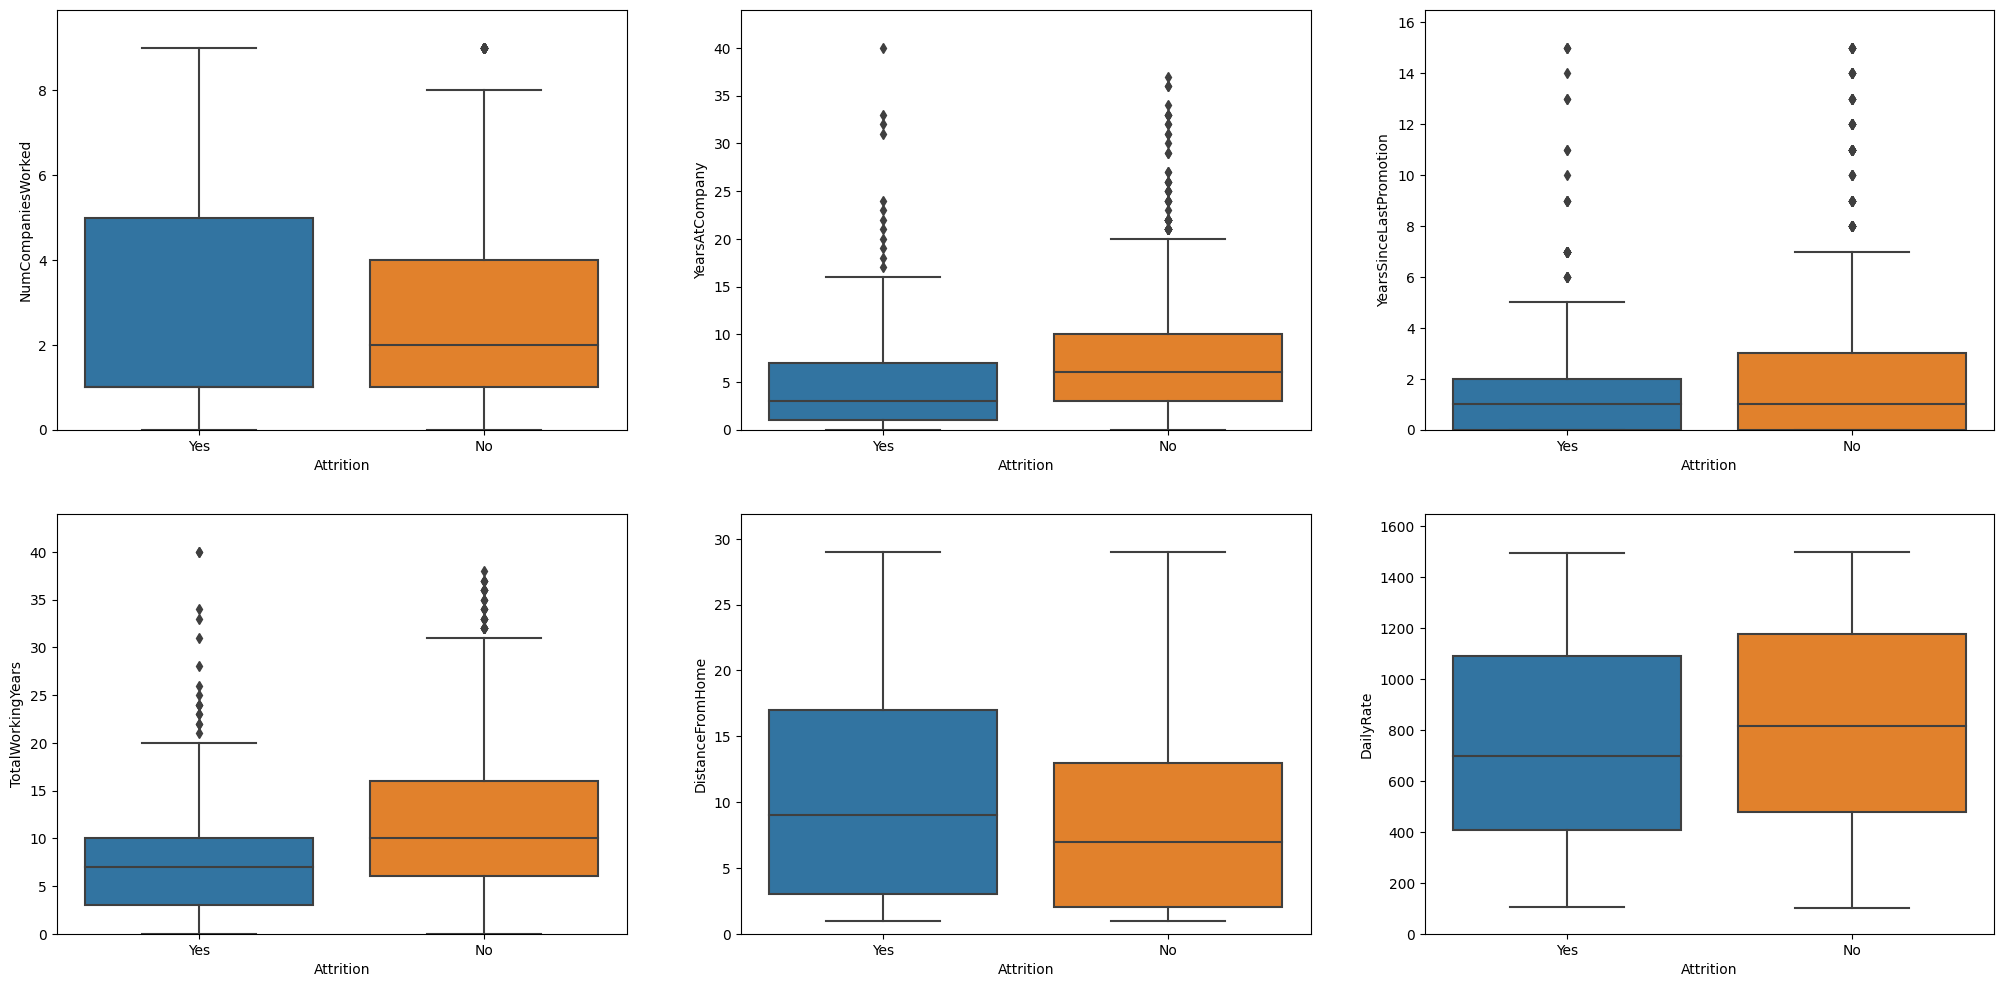

In [9]:
fig, axs =plt.subplots(2,3, figsize=(25, 12))
plotbox("NumCompaniesWorked", "Attrition", axs[0][0])
plotbox("YearsAtCompany", "Attrition", axs[0][1])
plotbox("YearsSinceLastPromotion", "Attrition", axs[0][2])
plotbox("TotalWorkingYears", "Attrition", axs[1][0])
plotbox("DistanceFromHome", "Attrition", axs[1][1])
plotbox("DailyRate", "Attrition", axs[1][2])




# Modeling



In [3]:


import mlflow
from src.models.svm import SVMFlow
def create_model(penalty="l1", loss="squared_hinge", dual=False, tol=1e-3):

    return SVMFlow(penalty=penalty, loss=loss, dual=dual, tol=tol)


model = create_model()


In [4]:
from sklearn.model_selection import train_test_split

SEED = 42
X = df.drop(["Attrition"], axis=1)
y = df["Attrition"]


model.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [5]:
from sklearn.metrics import classification_report

model.fit(X_train, y_train)

/home/jafar/Desktop/crayon/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, penalty='l1', tol=0.001)

# testing

In [6]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.90      0.91      0.91       255
          No       0.39      0.36      0.37        39

    accuracy                           0.84       294
   macro avg       0.65      0.64      0.64       294
weighted avg       0.83      0.84      0.84       294



In [7]:
mlflow.sklearn.save_model(model, "./src/data/SVCmodel")

In [8]:
model

In [133]:
import random
pieces = df[:random.randint(3, 1000)]
data  = pieces.drop(["Attrition"], axis=1).to_dict(orient='split')
# data  = pieces.to_dict(orient='split')

local = "127.0.0.1"
remote = "ae446d0141fbd4037aef4fe5fcd3a5d8-402455921.eu-west-2.elb.amazonaws.com"
import requests, json
headers = {'Content-type': 'application/json'}
data = {"dataframe_split" : {"columns" : data["columns"], "data" : data["data"]}}
ret = requests.post(f"http://{remote}:5000/invocations", data=json.dumps(data), headers=headers)
print(ret.content.decode())
# print(pieces['Attrition'])
print(len(ret.content.decode()))


{"predictions": ["Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No"]}
721


In [131]:
data

{'dataframe_split': {'columns': ['Age',
   'BusinessTravel',
   'DailyRate',
   'Department',
   'DistanceFromHome',
   'Education',
   'EducationField',
   'EmployeeCount',
   'EmployeeNumber',
   'EnvironmentSatisfaction',
   'Gender',
   'HourlyRate',
   'JobInvolvement',
   'JobLevel',
   'JobRole',
   'JobSatisfaction',
   'MaritalStatus',
   'MonthlyIncome',
   'MonthlyRate',
   'NumCompaniesWorked',
   'Over18',
   'OverTime',
   'PercentSalaryHike',
   'PerformanceRating',
   'RelationshipSatisfaction',
   'StandardHours',
   'StockOptionLevel',
   'TotalWorkingYears',
   'TrainingTimesLastYear',
   'WorkLifeBalance',
   'YearsAtCompany',
   'YearsInCurrentRole',
   'YearsSinceLastPromotion',
   'YearsWithCurrManager'],
  'data': [[41,
    'Travel_Rarely',
    1102,
    'Sales',
    1,
    2,
    'Life Sciences',
    1,
    1,
    2,
    'Female',
    94,
    3,
    2,
    'Sales Executive',
    4,
    'Single',
    5993,
    19479,
    8,
    'Y',
    'Yes',
    11,
    3,
   